# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 41.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 68.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 24.4MB/s]


In [4]:
data = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.isna().sum()  # как мы видим nan значений ни в одном из столбцов нет, поэтому нет надобности их удалять

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [7]:
data.sample(frac=0.7) # случайным образом выберем 70% нашего датафрейма и проанализируем

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1529,56,96.95,5432.2,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),0
620,60,20.55,1205.05,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1112,1,48.75,48.75,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
2842,1,50.70,50.7,Male,0,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
4815,14,51.45,727.85,Female,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,7,44.65,322.5,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
4363,17,83.55,1329.15,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,0
85,8,65.45,554.45,Female,0,No,No,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,0
2283,34,50.20,1815.3,Female,0,Yes,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [8]:
# преобразуем значения в столбце TotalSpent в float64 вместо object и везде, где есть ' ' заменим на 0
count = 0
for _ in data['TotalSpent']:
  if _ == ' ':
    data.loc[count,'TotalSpent'] = 0
  count += 1

data['TotalSpent'] = data['TotalSpent'].astype(float)

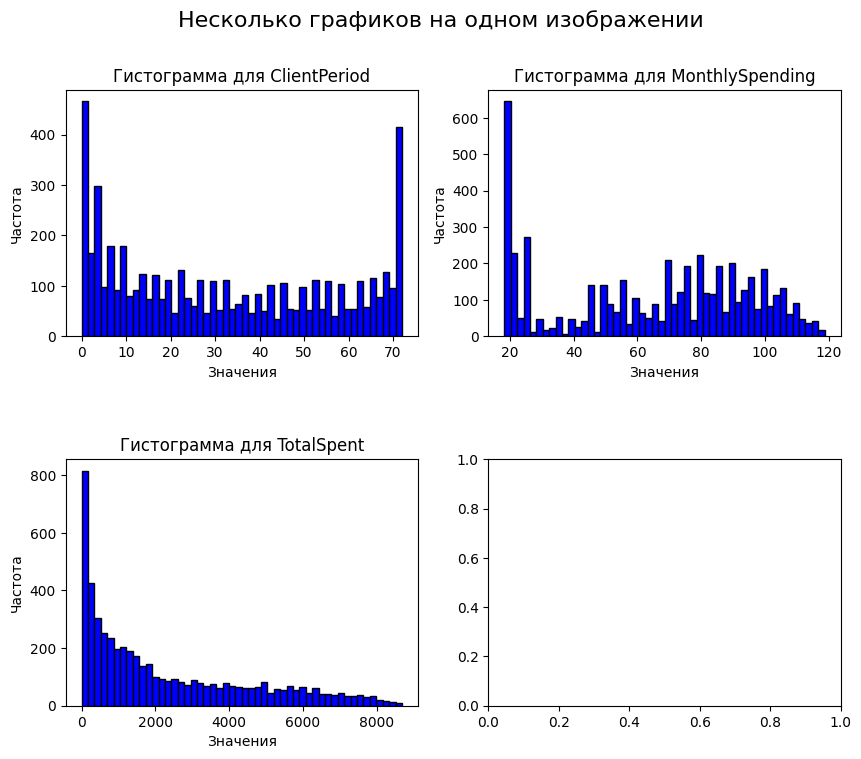

In [9]:
# выведем гистограммы для численных признаков
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i in range(len(num_cols)):

  ax = axs[i // 2, i % 2]
  ax.hist(data[num_cols[i]], color = 'blue', edgecolor = 'black', bins=50)

  ax.set_title(f'Гистограмма для {num_cols[i]}')

  ax.set_xlabel('Значения')
  ax.set_ylabel('Частота')

plt.suptitle('Несколько графиков на одном изображении', fontsize=16)
fig.subplots_adjust(hspace=0.5)
plt.show()


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

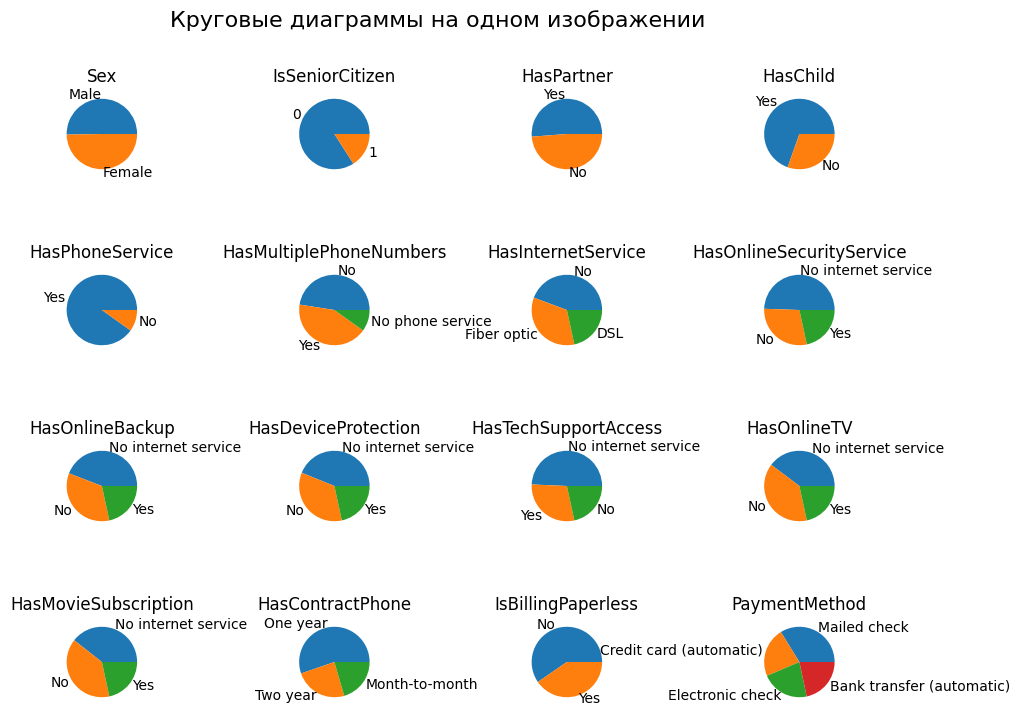

In [10]:
# выведем круговые диаграммы для категориальных признаков
fig, axs = plt.subplots(4, 4, figsize=(10, 8))

for i in range(len(cat_cols)):
  data_value_count = data[cat_cols[i]].value_counts()
  labels = data[cat_cols[i]].unique()

  axs.flatten()[i].set_title(f'{cat_cols[i]}')
  axs.flatten()[i].pie(data_value_count, labels=labels)
  axs.flatten()[i].axis('equal')

plt.suptitle('Круговые диаграммы на одном изображении', fontsize=16)
fig.subplots_adjust(hspace=1, wspace=2)
plt.show()

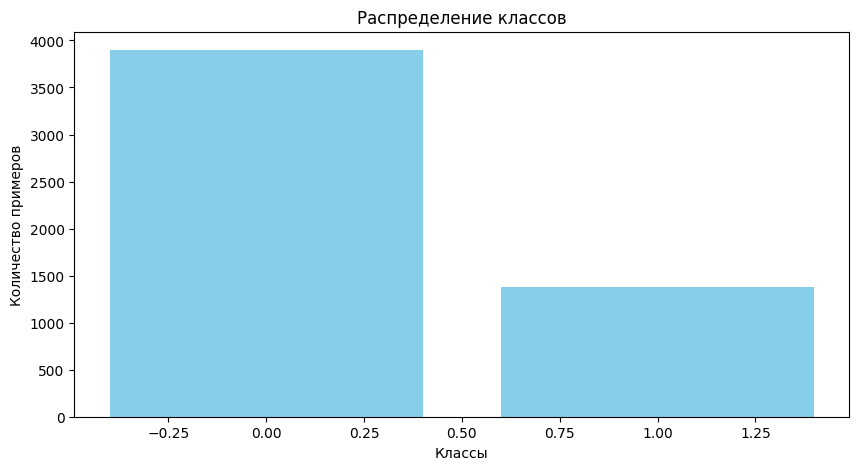

In [11]:
y = data['Churn']

class_counts = y.value_counts()

plt.figure(figsize=(10, 5))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.title('Распределение классов')
plt.xlabel('Классы')
plt.ylabel('Количество примеров')
plt.show()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [13]:
data[num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45
...,...,...,...
5277,3,30.40,82.15
5278,50,44.45,2188.45
5279,1,55.05,55.05
5280,29,76.00,2215.25


In [14]:
data[num_cols].max()

,0
ClientPeriod,72.00
MonthlySpending,118.75
TotalSpent,8684.80


In [15]:
data[num_cols].min()

,0
ClientPeriod,0.00
MonthlySpending,18.25
TotalSpent,0.00


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [16]:
# нормализуем числовые данные при помощи стандартного отклонения

scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

In [17]:
data[num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
0,0.920767,-1.505447,-0.555852
1,1.613288,-1.294998,-0.183039
2,-1.279005,0.363737,-0.974768
3,-0.016173,0.476418,0.124519
4,1.124450,1.667856,1.970599
...,...,...,...
5277,-1.197532,-1.144204,-0.972013
5278,0.717084,-0.678565,-0.043651
5279,-1.279005,-0.327265,-0.983957
5280,-0.138382,0.367051,-0.031838


In [18]:
data[num_cols].min()

,0
ClientPeriod,-1.319741
MonthlySpending,-1.546873
TotalSpent,-1.008221


In [19]:
data[num_cols].max()

,0
ClientPeriod,1.613288
MonthlySpending,1.783852
TotalSpent,2.819648


Применим One-hot кодирование для категориальных данных

In [20]:
data.info()
numeric_indx = np.array([0, 1, 2, 4, 19])
cat_indx = np.array([3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   float64
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [21]:
numeric_data = data[data.columns[numeric_indx]]

categorial_data = data[data.columns[cat_indx]]
categorial_data.head()

,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [22]:
dummy_features = pd.get_dummies(categorial_data, dtype=int)
dummy_features.head()

,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
1,0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,1,0,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,1,0,0,1,0,0


In [23]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.555852,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.183039,0,0,0,1,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.974768,0,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.124519,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970599,0,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [24]:
y = data['Churn']

In [25]:
X.shape, X_origin.shape

((5282, 46), (5282, 19))

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# 1. Определение значений гиперпараметра C
C_values = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0000000000000000001]
roc_auc_scores = {}

# 2. Тестирование различных значений C
for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear', random_state=42)

    # 3. Оценка модели с помощью кросс-валидации
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    roc_auc_scores[C] = scores.mean()
    print(f'C={C}, ROC-AUC={roc_auc_scores[C]}')

C=10000, ROC-AUC=1.0
C=1000, ROC-AUC=1.0
C=100, ROC-AUC=1.0
C=10, ROC-AUC=1.0
C=1, ROC-AUC=1.0
C=0.1, ROC-AUC=1.0
C=0.01, ROC-AUC=0.9996186005331106
C=0.001, ROC-AUC=0.9496615413667626
C=1e-19, ROC-AUC=0.5


Поскольку значения C от 1000 до 0.1 дают одинаковый идеальный результат (ROC-AUC = 1.0), так как нам важна простота и интерпретируемость модели, можно выбрать более низкое значение, например, C = 10 или C = 1, так как они обеспечивают хорошую производительность и менее подвержены переобучению.

In [28]:
# теперь сделаем через LogisticRegressionCV
# 1. Создание модели с кросс-валидацией
model = LogisticRegressionCV(Cs=C_values, scoring='roc_auc', cv=5, refit=True, solver='liblinear', random_state=42)

# 2. Обучение модели
model.fit(X_train, y_train)

# 3. Получение лучшего значения C и оценка на валидационной выборке
best_C = model.C_[0]  # Лучшее значение C
roc_auc = model.score(X_valid, y_valid)  # ROC-AUC на валидационной выборке

print(f'Лучшее значение C: {best_C}')
print(f'ROC-AUC на валидационной выборке: {roc_auc}')

Лучшее значение C: 10000.0
ROC-AUC на валидационной выборке: <function roc_auc_score at 0x7b579ffdf2e0>


По сути вышло тоже самое, опять же из-за причины выше, я выберу c = 1

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [29]:
y = data['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,0
...,...
5277,0
5278,0
5279,0
5280,0


In [30]:
X = data.drop('Churn', axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,0.920767,-1.505447,-0.555852,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,1.613288,-1.294998,-0.183039,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,-1.279005,0.363737,-0.974768,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,-0.016173,0.476418,0.124519,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,1.124450,1.667856,1.970599,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [31]:
!pip install catboost

In [32]:
from catboost import CatBoostClassifier, Pool

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели с параметрами по умолчанию
model = CatBoostClassifier(random_seed=42, verbose=200)
model.fit(X_train, y_train, cat_features=cat_cols)

# Оценка модели на валидационной выборке
y_pred = model.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred)

print(f'ROC-AUC с параметрами по умолчанию: {roc_auc}')

Learning rate set to 0.019062
0:	learn: 0.6795793	total: 90.3ms	remaining: 1m 30s
200:	learn: 0.3837617	total: 6.4s	remaining: 25.4s
400:	learn: 0.3647929	total: 13s	remaining: 19.4s
600:	learn: 0.3435483	total: 22.1s	remaining: 14.7s
800:	learn: 0.3251517	total: 29.9s	remaining: 7.43s
999:	learn: 0.3100870	total: 35.7s	remaining: 0us
ROC-AUC с параметрами по умолчанию: 0.821409111478468


In [38]:
# Определение диапазонов для параметров
n_estimators_values = [100, 200, 300]
learning_rates = [0.01, 0.1, 0.2]

best_roc_auc = 0
best_params = {}
best_model = None  # Переменная для хранения лучшей модели

# Перебор значений параметров
for n_estimators in n_estimators_values:
    for learning_rate in learning_rates:
        model = CatBoostClassifier(n_estimators=n_estimators,
                                   learning_rate=learning_rate,
                                   random_seed=42,
                                   verbose=200)

        model.fit(X_train, y_train, cat_features=cat_cols)

        # Оценка модели на валидационной выборке
        y_pred = model.predict_proba(X_valid)[:, 1]
        roc_auc = roc_auc_score(y_valid, y_pred)

        print(f'n_estimators={n_estimators}, learning_rate={learning_rate}, ROC-AUC={roc_auc}')

        # Сохранение лучших параметров и модели
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate}
            best_model = model  # Сохраняем лучшую модель

print(f'Лучшие параметры: {best_params} с ROC-AUC: {best_roc_auc}')

0:	learn: 0.6891697	total: 5.29ms	remaining: 523ms
99:	learn: 0.4939662	total: 457ms	remaining: 0us
n_estimators=100, learning_rate=0.01, ROC-AUC=0.8007683711823864
0:	learn: 0.6551070	total: 5.15ms	remaining: 510ms
99:	learn: 0.3795133	total: 483ms	remaining: 0us
n_estimators=100, learning_rate=0.1, ROC-AUC=0.8262552987135325
0:	learn: 0.6208990	total: 5.05ms	remaining: 500ms
99:	learn: 0.3596231	total: 441ms	remaining: 0us
n_estimators=100, learning_rate=0.2, ROC-AUC=0.8234454798164036
0:	learn: 0.6859740	total: 15.5ms	remaining: 3.07s
199:	learn: 0.4034107	total: 2.68s	remaining: 0us
n_estimators=200, learning_rate=0.01, ROC-AUC=0.8241011811859884
0:	learn: 0.6268933	total: 16.7ms	remaining: 3.32s
199:	learn: 0.3118756	total: 2.75s	remaining: 0us
n_estimators=200, learning_rate=0.1, ROC-AUC=0.8196498000572584
0:	learn: 0.5724954	total: 16.2ms	remaining: 3.23s
199:	learn: 0.2456880	total: 4.56s	remaining: 0us
n_estimators=200, learning_rate=0.2, ROC-AUC=0.8130858599384934
0:	learn: 0

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [39]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] =  best_model.predict_proba(X_test)[:, 1]# используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.